# Basic terminology

## What is Supervised Learning?
- Supervised Learning is all about learning from examples.
- The basic idea is to identify meaningful patterns associated with some target label or value.
- Then use these patterns to create a mapping function that is able to map unseen data to the trained value or label.


## Two common procedures
| | Classification |	Regression|
|:--|:--|:--|
| dependent variables | categorical	| continuous|
| Output | predicted Class |	predicted value |
| Performance |	Accuracy |	Deviation| 

## Classification and Regression
- In machine learning, both classification and regression are almost always static models. 
- In static models a distinction exists between two independent stages: 
    1. The learning stage, when learners are trained on a training set 
    2. The performance stage where the model is tested using an independent test set.


## What is classification?
- Classification belongs to the category of supervised learning where matching targets (y) and input data (X) are used to train the model.
- The goal of classification algorithms is to uncover a perfect relationship $f(X)=y$ 
- However, in reality data is noisy... therefore $f(X)=y +\epsilon$
- In Classification we use some computational method to train a model $\hat f(X) \approx f(X)$:
    - Which means we try to find a mapping function (f)
    - Based on some input dataset (X)
    - To create discrete output labels (y)
    - That is close as possible to the hypothetical model $f(X)$

## Types of classification tasks 
- Binary Classification: Classification task with two possible outcomes. 
  - Eg: Young/Old or Male/Female
- Multi-class classification: Classification with more than two classes. 
  - Eg: Visual/Auditory/Motor
- Multi-label classification: Classification task where each sample is mapped to a set of target labels (more than one class).  
  - Predicting whether a patient has one or more of the following disorders: depression, anxiety, schizophrenia, bipolar disorder, and substance abuse.


## Standard steps involved in building a classification model
- Initialize a classifier. Initialization commonly involves defining initial parameters specific to the type of classifier.
- Train the classifier. All classifiers in scikit-learn are trained using the same fit(X, y) method. That fits the model to the training data (X) and the matching label (y).
- Predict the target: Given an unseen observation X, the predict(X) returns the predicted label y.
- Evaluate the classifier model using different strategies 

## Many different classification algorithms    
![](https://scikit-learn.org/0.15/_images/plot_classifier_comparison_0011.png)
It is out of the scope to cover all of these model families (and even this list is not exhaustive) 

- [Distance-Based](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn) e.g. K Neighbors Classifier
- [Statistical](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) - e.g naive-bayes
- [linear model](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) - e.g. logistic regression
- [Kernel](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python) - e.g. Support vector machine 
- [Tree-Based](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)  e.g. decision tree classifier
- [Ensemble Learners](https://www.datacamp.com/community/tutorials/ensemble-learning-python) - bagging and boosting

### Distance-Based 

The non-parametric algorithms assume that the geometric similarity between observations across the feature space relates to the response vector. These relationships enable us to categorize according to these patterns.

One of the most widely used and easiest non-parametric machine learning algorithms is the k-nearest-neighbour (k-NN) algorithm.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. The model stores all the training data and for each new point it identifies the `k` neighbours and predicts the label using some heuristic (for classification it is the most common label or the mode)  

### Statistical

The assumption in these techniques is that the data follows a probability function that needs to be inferred from the dataset. The Gaussian naive Bayes model (Gaussian NB) is normally used with continuous data, where each class' continuous value is assumed to follow a Gaussian distribution.

### Linear model

Basically, a linear classifier makes a classification decision based on a linear combination of features. The use of such classifiers is very useful for most classification issues, and it is often considered the first choice for problems with multiple variables (features), as they reach accuracy levels comparable to non-linear classifiers with a lot less training time and effort.
In its simplest form, logistic regression uses a logistic function to model a binary dependent variable, though there are many more complex extensions available. Binomial logistic models have two possible outcomes, like pass/fail, that's represented by two variables, "0" and "1".

### Kernel models
Kernel methods reach their name by using kernel functions, which enable the user to operate in a high-dimensional, implicit feature space without ever calculating its coordinates. These models perform pattern analysis based on a kernel function, which is a similarity function over pairs of data points.
The support vector machine uses a kernel to identify pairwise distances to establish a support vector group of observations that together construct a localised margin between classes in a way that maximizes the separation between classes.

### Tree-Based
In these techniques, interpretable decision rules inferred from the training data are used to predict a target variable. Using a decision tree as a predictive model is widely used because it is easy to interpret (i.e., it provides a series of decisions that leads to the final classification result).

### Ensemble Learners - Harnessing the wisdom of crowds 
The basic idea is that one strong classifier is weaker than a committee of weak classifiers.  These models combine the predictions of several base estimators often reoffered to as weak learners built with a given learning algorithm to improve the results and robustness over a single estimator. 

#### What is a weak learner?
“Weak learners” is a broad definition for any learning algorithm that is slightly better than randomly guessing


#### Bagging - Random forest
Bagging (Bootstrap Aggregation) – train each of the classifiers using a fresh training subset using random sample with replacement (effectively  reduce the variance in the dataset). An ensemble of decision trees makes up the random forest method. Several different decision trees are used, each created from a subset of features selected at random. Random forests are hard to interpret since they have multiple decision trees (in some cases, decisions are made by voting on seemingly contradictory facts). They perform well with high-dimensional data, however, and do not require any domain knowledge or complicated parameters.

#### Boosting 
Boosting – each member of the committee is forced to classify a specific set of hard problems that the previous member struggled with. The idea is to train extremely shallow trees where in each step a portion of the feature space that the previous model performed poorly on is prioritised   


## let's get to know some of the different algorithms using toy data

- We will start by creating the simplest 2D data-set 
- Look at several methods 
- Then make the data more complex 

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification,make_blobs,make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
plt.style.use('bmh')

## Compare some key players to gain intuition to how they work

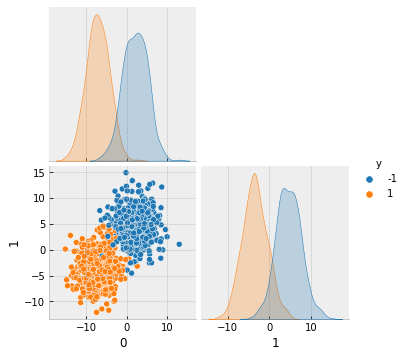

In [165]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,cluster_std=3,random_state=2021)
y[y==0]=-1
data = pd.DataFrame(X)
data['y'] = y
sns.pairplot(data,hue='y',palette='tab10', corner=True)

Text(0.5, 1.0, 'Test set')

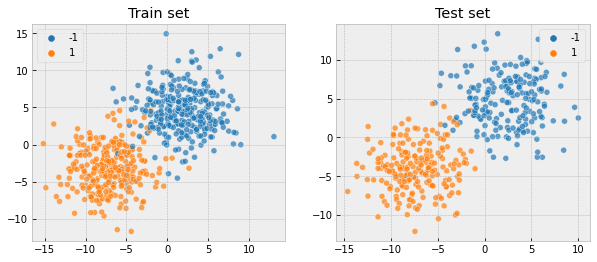

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 2021,test_size=0.4)
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,alpha=0.7,palette='tab10',ax=ax[0])
ax[0].set_title('Train set')
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test,alpha=0.7,palette='tab10',ax=ax[1])
ax[1].set_title('Test set')

## Some key players 
These models are very poorly parametrised to make their inner working apparent

In [167]:
models = {
    "Logistic Regression" :LogisticRegression(),
    "K-nearest neighbors" :  KNeighborsClassifier(n_neighbors=5),
    "Radial Basis Support Vector" : SVC(kernel="rbf",probability=True,random_state=2022),
    "Ada Boost": AdaBoostClassifier(random_state=2022,n_estimators=3),
    "Random Forest (Bagging+)": RandomForestClassifier(n_estimators=3,min_samples_leaf=10,random_state=2022),
}

## What is the likelihood of an observation to be part of class a? 
- We are interested in probabilities and all the models we will look at will have some way to predict labels and the likelihood value associated with that decision

In [168]:
def decision_boundaries_plot(ax,mdl,X_train,X_test,Y_train,Y_test,title=None,cmap='PiYG',step_size=0.05):
    extent = np.array([np.min(X_train,axis=0)*1.1,np.max(X_train,axis=0)*1.1]).T.flatten()
    mdl.fit(X_train,Y_train)
    fs1, fs2 = np.meshgrid(np.arange(extent[0],extent[1], step_size),
                           np.arange(extent[2],extent[3], step_size))
    mesh = np.vstack([fs1.flatten(),fs2.flatten()])
    p = mdl.predict_proba(mesh.T)
    z = np.reshape(p[:,1]-p[:,0],fs1.shape)
    ax.imshow( z, cmap=cmap,alpha=0.5,origin='lower',extent=extent,aspect='auto',vmin=-1,vmax=1)
    ax.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_test,alpha=0.7,cmap=cmap)
    ax.set_title(title)

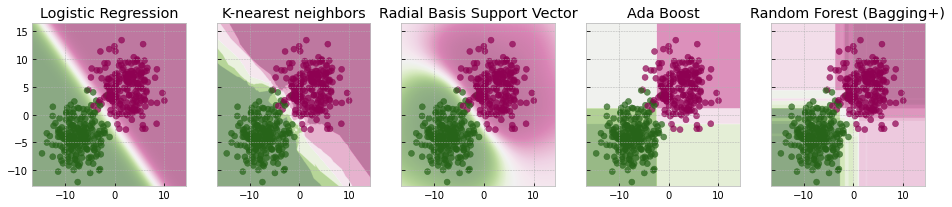

In [170]:
fig,ax = plt.subplots(1,5,sharey=True,sharex=True,figsize=(16,3))
for i,(title,mdl) in enumerate(models.items()):
    decision_boundaries_plot(ax[i],mdl,X_train,X_test,y_train,y_test,title)

## What about a noisy dataset? 

Text(0.5, 1.0, 'Test set')

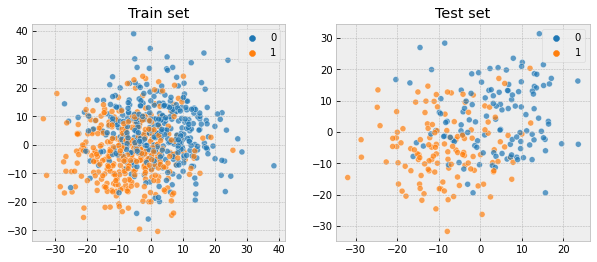

In [171]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,cluster_std=10,random_state=2021)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 2021)
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,alpha=0.7,palette='tab10',ax=ax[0])
ax[0].set_title('Train set')
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test,alpha=0.7,palette='tab10',ax=ax[1])
ax[1].set_title('Test set')

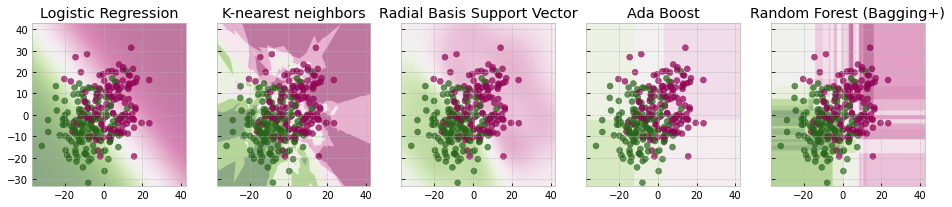

In [172]:
fig,ax = plt.subplots(1,5,sharey=True,sharex=True,figsize=(16,3))
for i,(title,mdl) in enumerate(models.items()):
    decision_boundaries_plot(ax[i],mdl,X_train,X_test,y_train,y_test,title)

## What about non-linear datasets?

Text(0.5, 1.0, 'Test set')

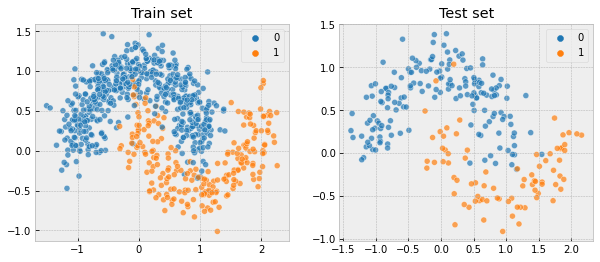

In [174]:
X, y = make_moons(n_samples=(700,300), shuffle=True, noise=0.2, random_state=2020)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 2021)
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train,alpha=0.7,palette='tab10',ax=ax[0])
ax[0].set_title('Train set')
sns.scatterplot(x=X_test[:,0],y=X_test[:,1],hue=y_test,alpha=0.7,palette='tab10',ax=ax[1])
ax[1].set_title('Test set')

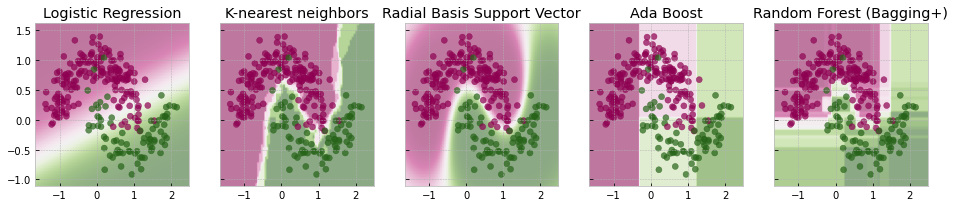

In [175]:
fig,ax = plt.subplots(1,5,sharey=True,sharex=True,figsize=(16,3))
for i,(title,mdl) in enumerate(models.items()):
    decision_boundaries_plot(ax[i],mdl,X_train,X_test,y_train,y_test,title)

## Break

## Why do we need to approximate classifiers performance?
- Estimating classifiers performance is an essential tool for answering some of the following questions:
    - Is there any useful information that can be used to classify events above random chance
    - Compare between information sources. I.e. which subsets of the data are more informative  
    - Identify/rank important sources of information. I.e. are there individual features that contribute more information than other
    - Distinguish between global or local effects
    - Are the natural separations in the data linear, polynomial or non-linear                      


## How do we estimate classifiers performance 
- There are several [ways](https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions) 
the simplest is using some metric that evaluates the performance of each method
- Among the many different metrics, the easiest to understand is classification accuracy
- This measure simply counts the amount of accurately predicted labels and divides them by the total number of events 


## Use `make_classification` to create synthetic dataset 
- We previously used numpy to simulate data but sklearn has it's own wrappers that do the same thing internally 

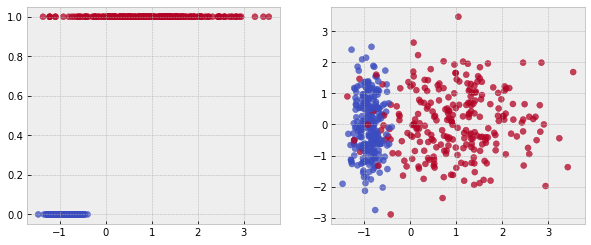

In [13]:

X, y = make_classification(n_samples=500,n_classes=2,n_redundant=0,n_repeated=0,n_informative=1
                           ,n_clusters_per_class=1,n_features=2,class_sep=0.9,random_state=2022)
f, ax = plt.subplots(1,2,figsize=(10, 4))
ax[0].scatter(X[:,0],y,c=y,cmap='coolwarm',alpha=0.75);
ax[1].scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.75);

In [196]:
models = {"KNN"   : KNeighborsClassifier(),
          "LDA"   : LinearDiscriminantAnalysis(),
          "LOGC"  : LogisticRegression(),
          "SVC"   : SVC(probability=True),
          "Lasso" : LogisticRegression(penalty='l1',solver="liblinear"),
          "Boost" : AdaBoostClassifier(),
          "Bag"   : RandomForestClassifier(),
          "TREE"  : DecisionTreeClassifier()}



## The wrong way to measure classification accuracy
- Let's take the naive approach and understand the problems with it?

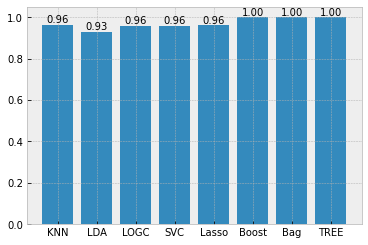

In [33]:
from sklearn.metrics import accuracy_score,classification_report
n_models = len(models.keys())
bad_performance = [None]*n_models
for i,(name,mdl) in enumerate(models.items()):
    bad_performance[i] = accuracy_score(y,mdl.fit(X,y).predict(X))
f, ax = plt.subplots(1,1,figsize=(6, 4))
ax.bar(range(n_models),height=bad_performance);  
ax.set_xticks(range(n_models))
ax.set_xticklabels(list(models.keys()));
for i,rect in enumerate(ax.patches):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height,
        f'{bad_performance[i]:.2f}',ha='center', va='bottom'); 

## We were measuring the method tendency to overfit 
- When we are creating a classification model, we aim to identify general/global patterns 
that describe some real phenomena that differentiate between the two groups  
- Overfitting describes the situation where the model is uncovering local noise patterns that 
are specific to the data-set but do not reflect a real effect 
- As a result, the model will be extremely accurate in the training stage but will fail when tested on unseen data 
- This example also highlights the sensitivity of non-parametric models (decision trees) to overfit data 


## Another problem the previous example had 
- We performed another mistake in the last example
- A model is trained by maximizing its accuracy on the training dataset
- However, performance is determined on its ability to perform well on unseen data.
- In this case, overfitting reflects our model attempt to memorize the training data as opposed 
to uncovering generalized patterns existing in the training data.

## overfitting causes 
- High dimensional data is susceptible to [overfitting](https://en.wikipedia.org/wiki/Overfitting) 
- The larger the feature space, the more it is affected by local noise patterns 
- This problem of higher dimension is known as the Curse of Dimensionality.
- To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions.
- Also, small datasets are more sensitive to the effects of noise 
- Unfortunately we don’t usually have the luxury of gathering an extensive database in neuroscience. 
- We need a way to approximate real performance 

## [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance) as a solution 
- Cross-validation is a set of techniques for assessing how the results of a statistical analysis will generalize to an independent data set.
- The simplest way to cross-validate is to split the dataset into two parts (training and testing) and approximate performance only on the test-set 

## Let's update (increase dimensionality) our example and estimate performance 
- The first plot shows the association between samples, and the square pattern is evidence for clustering 
- The second shows the association between features
- Based on what we now know we would expect near-perfect classification on training set now 


<AxesSubplot:>

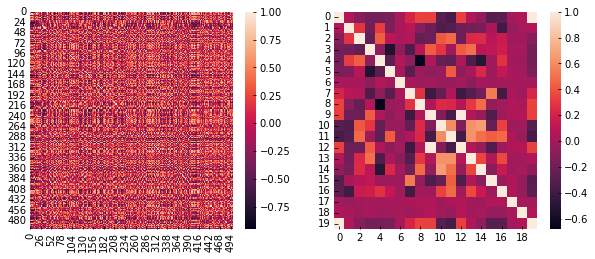

In [35]:
import seaborn as sns
X, y = make_classification(n_samples=500,n_classes=2,n_redundant=5,flip_y=0,n_repeated=2,
                    n_informative=10,n_clusters_per_class=1,n_features=20,random_state=2022)
f, ax = plt.subplots(1,2,figsize=(10, 4))
sns.heatmap(np.corrcoef(X),ax=ax[0])
sns.heatmap(np.corrcoef(X.T),ax=ax[1])

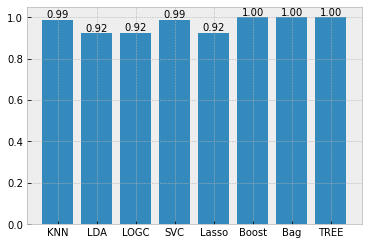

In [36]:
n_models = len(models.keys())
bad_performance = [None]*n_models
for i,(name,mdl) in enumerate(models.items()):
    bad_performance[i] = accuracy_score(y,mdl.fit(X,y).predict(X))
f, ax = plt.subplots(1,1,figsize=(6, 4))
ax.bar(range(n_models),height=bad_performance);  
ax.set_xticks(range(n_models))
ax.set_xticklabels(list(models.keys()));
for i,rect in enumerate(ax.patches):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height,
        f'{bad_performance[i]:.2f}',ha='center', va='bottom'); 

## The data is both high-dimensional and very clean, let's add some noise  
- flip_y controls the fraction of samples whose class is assigned randomly.
- Larger values introduce noise in the labels and make the classification task harder.

<AxesSubplot:>

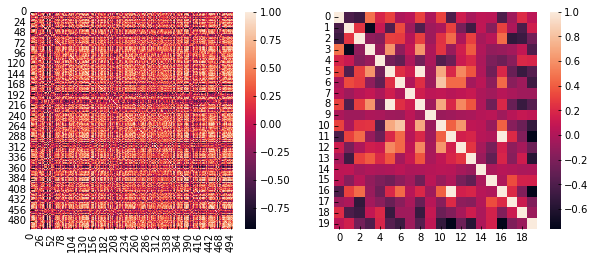

In [37]:
X, y = make_classification(n_samples=500,n_classes=2,n_redundant=5,flip_y=0.5,n_repeated=2,
                    n_informative=10,n_clusters_per_class=1,n_features=20,random_state=2020)
f, ax = plt.subplots(1,2,figsize=(10, 4))
sns.heatmap(np.corrcoef(X),ax=ax[0])
sns.heatmap(np.corrcoef(X.T),ax=ax[1])

# Now we will Compare performance on train vs test parts

- Lets split the data to two parts and examine the model performance on the unseen part compared to the trained subset


In [40]:
from sklearn.model_selection import train_test_split
n_models = len(models.keys())
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2020, shuffle=True,stratify=y)
performance = pd.DataFrame(np.zeros((n_models,2)),columns = ['Train','Test'],index = models.keys())
for i,(name,mdl) in enumerate(models.items()):
    performance.loc[name,:] = (accuracy_score(y_train,mdl.fit(X_train,y_train).predict(X_train)),
                        accuracy_score(y_test,mdl.fit(X_train,y_train).predict(X_test)))

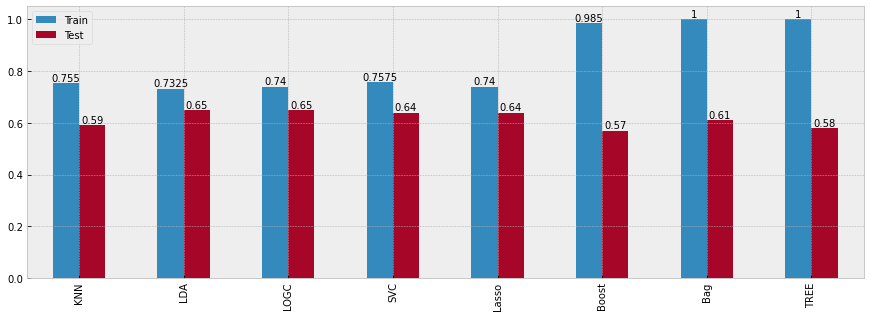

In [47]:
ax = performance.plot.bar(figsize=(15,5))
[ax.bar_label(ax.containers[i]) for i in range(2)];

## Some methods are much more sensitive to overfitting
- It is clear that all models have a substantial decrease in accuracy when applied to the unseen subset 
- Each type of model has different ways of dealing with overfitting 
- For example in KNN increasing the number neighbors forces the model to take into account more points 
when assigning a label to unseen data and as a result the learned pattern is less specific 


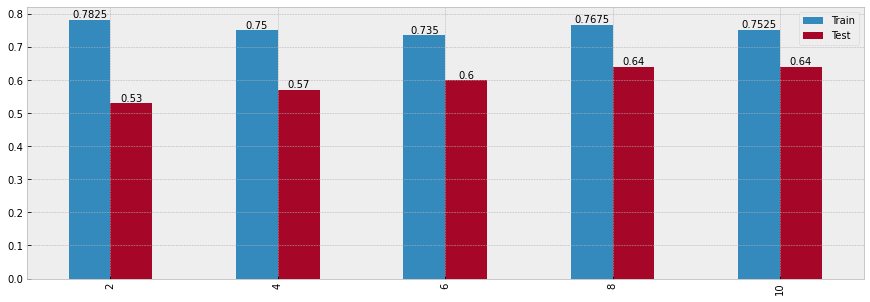

In [49]:
k_steps = np.arange(2,12,2)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2020, shuffle=True,stratify=y)

performance = pd.DataFrame(np.zeros((len(k_steps),2)),columns = ['Train','Test'],index = k_steps)
for i,k in enumerate(k_steps):
    tmp = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    performance.loc[k,:] = (accuracy_score(y_train,tmp.predict(X_train)),
                        accuracy_score(y_test,tmp.predict(X_test)))
    
ax = performance.plot.bar(figsize=(15,5))
[ax.bar_label(ax.containers[i]) for i in range(2)];    

## Reducing dimensionality in decision trees 

- We saw that decision trees are susceptible to overfitting 
- One reason for that is that unless told otherwise, the algorithm will find some rule to split all leaves (samples)
- We can constrain this behaviour by forcing depth threshold  
- This will result in a tree that only has the most informative dimensions
- Examine the dramatic effect pruning (restricting the depth of the tree) the tree has on training accuracy 


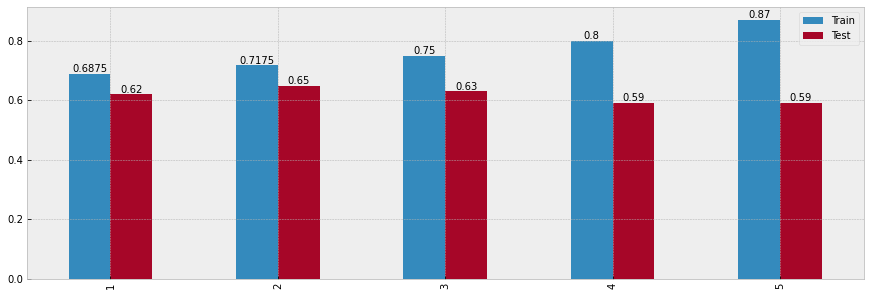

In [50]:
depth_steps = np.arange(1,6,1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2020, shuffle=True,stratify=y)

performance = pd.DataFrame(np.zeros((len(depth_steps),2)),columns = ['Train','Test'],index = depth_steps)
for i,k in enumerate(depth_steps):
    tmp = DecisionTreeClassifier(max_depth=k).fit(X_train,y_train)
    performance.loc[k,:] = (accuracy_score(y_train,tmp.predict(X_train)),
                            accuracy_score(y_test,tmp.predict(X_test)))
    
ax = performance.plot.bar(figsize=(15,5))
[ax.bar_label(ax.containers[i]) for i in range(2)]; 

## We can also control the number of leaves each rule has 
- By default, each leaf is equivalent to one sample 
- In this context, a split rule can separate between two samples 
- This behaviour is precisely opposite to converging on general split points 
- And unsurprisingly it has a similar effect 

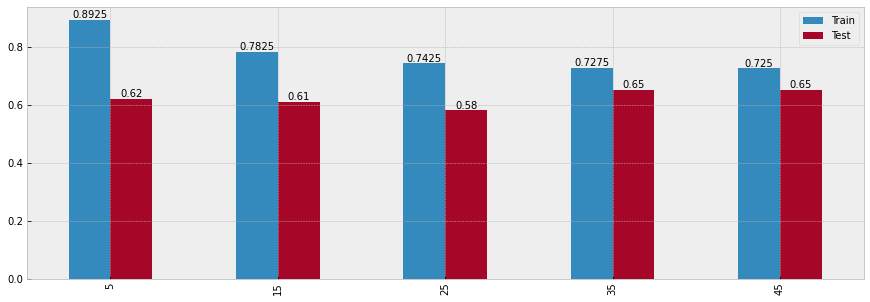

In [51]:
min_samples_steps = np.arange(5,55,10)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2020, shuffle=True,stratify=y)

performance = pd.DataFrame(np.zeros((len(min_samples_steps),2)),columns = ['Train','Test'],index = min_samples_steps)
for i,k in enumerate(min_samples_steps):
    tmp = DecisionTreeClassifier(min_samples_leaf=k).fit(X_train,y_train)
    performance.loc[k,:] = (accuracy_score(y_train,tmp.predict(X_train)),
                            accuracy_score(y_test,tmp.predict(X_test)))
    
ax = performance.plot.bar(figsize=(15,5))
[ax.bar_label(ax.containers[i]) for i in range(2)]; 

## Limitations of the train test split approach 

- Requires big datasets 
- Wasteful (a significant portion of the data is not used)
- Is simple to manipulate (aka cherry-picking a random sample that is not representative of the reality)
- Suffers from knowledge leakage (happens when the method's parameters are optimised to the test set)
- One solution calls for a 3-way splitting instead of the 2-way train/test 
    - Separating data into training, validation and test
    - Using the validation set for Parameter tweaking
    - Reporting performance based on the test set 
- However, this method solves one problem but intensifies the rest.

## Cross-validation is one possible solution we covered last week
- Cross-validation is a family of splitting concepts used to reduce overfitting effects 
while leaning patterns from all the training data
- The most basic approach is called k-fold where the k validation/training subsets of the data are created 
- Importantly, when using k-fold CV we need to make sure each test fold has enough samples 


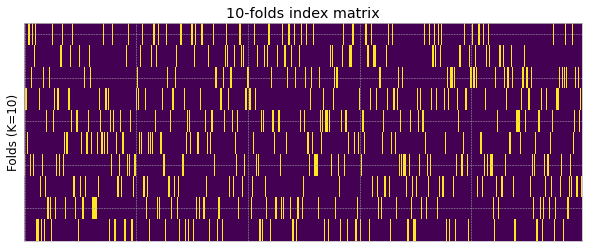

In [53]:
from sklearn.model_selection import KFold
k = 10
tick_args = {"axis" : "both", "which" : "both", "bottom" : False,
       "top" : False,"labelbottom":False, "right":False, "left":False, "labelleft":False}
cv = KFold(n_splits=k,random_state=2022, shuffle=True)
folds = np.zeros((len(y),k)).astype(bool)
for i,(train_index, test_index) in enumerate(cv.split(y)):
    folds[test_index,i] = True   
f, ax = plt.subplots(1,1,figsize=(10, 4)) 
ax.imshow(folds.T, interpolation='nearest',aspect='auto');
ax.tick_params(**tick_args)
ax.set_title('10-folds index matrix')
ax.set_ylabel(f"Folds (K={k})");   

In [72]:
cv = KFold(n_splits=k,random_state=2022, shuffle=True)
from sklearn.model_selection import train_test_split
n_models = len(models.keys())
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2020, shuffle=True,stratify=y)
performance = {}
c = 0
for i,(name,mdl) in enumerate(models.items()):
    for j,(ix_train, ix_test) in enumerate(cv.split(y_train)):
        inner_x, inner_y = X_train[ix_train],y_train[ix_train]
        mdl.fit(inner_x, inner_y)
        performance[c] = {'Model':name,'Fold':j,
            'Train':accuracy_score(y_train[ix_train],mdl.predict(inner_x)),
            'Val':accuracy_score(y_train[ix_test],mdl.predict(X_train[ix_test])),
            'Test':accuracy_score(y_test,mdl.predict(X_test))}
        c+=1
performance = pd.DataFrame(performance).T        
performance = performance.set_index(['Model','Fold']).stack().reset_index().rename(columns={'level_2':'CV',0:'Score'})

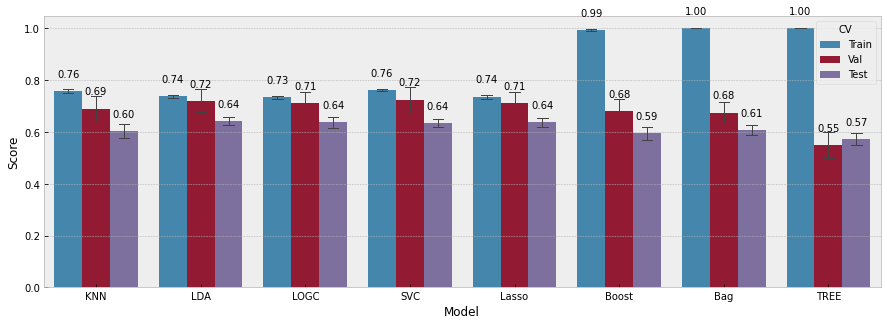

In [87]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(data=performance,x = 'Model',hue='CV',y = 'Score',
            estimator=np.mean, ci='sd', capsize=.1,errwidth=1)
[ax.bar_label(ax.containers[i],padding=12,fmt='%.2f') for i in range(3)]; 

## What are we missing? 
- We have some error around the accuracy 
- However, we are oblivious to how the models are performing internally 
- More specifically the accuracy measure we use is not providing us with any per class insight 
- Let's dig deeper and examine (in the next section) the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)


## Confusion matrix 
- The Confusion matrix allows visualization of the performance of classification methods
- To understand this better let us take a step back and return to the train test split 
- The central part of the confusion matrix is composed of counting performance per class 
- In the case of the 2-way classification problem (i.e. binary) it is a 2 x 2 matrix 
- The diagonal represents samples classified correctly and the anti-diagonal those that were misclassified 
![](cm.png)


In [108]:
from sklearn.metrics import confusion_matrix


n_models = len(models.keys())
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=2022, shuffle=True,stratify=y)
confusion = {}
c = 0
for i,(name,mdl) in enumerate(models.items()):
    mdl.fit(X_train,y_train)
    confusion[name] = dict(test = confusion_matrix(y_test, mdl.predict(X_test)), 
                           train = confusion_matrix(y_train, mdl.predict(X_train)))  

    

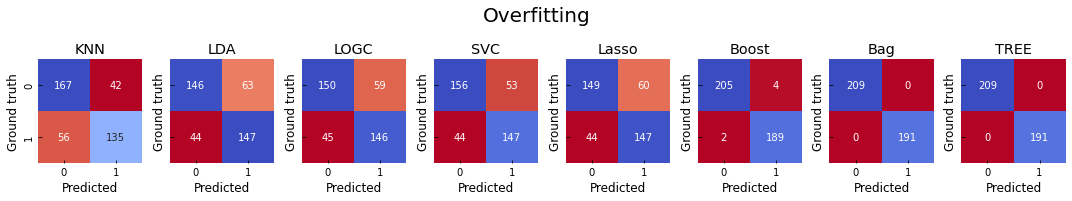

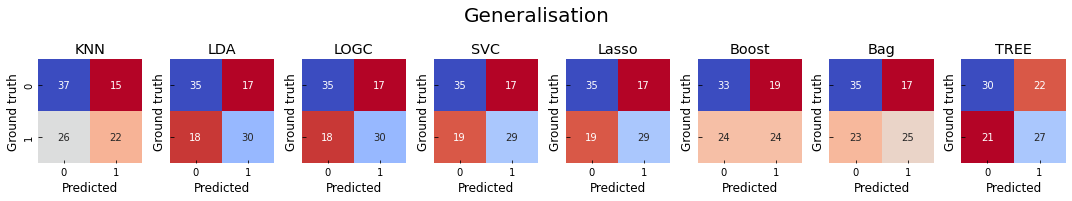

In [125]:
fig,ax = plt.subplots(1,n_models,figsize=(15,5),sharey=True)
ax = ax.flat
for i,name in enumerate(models.keys()):
    sns.heatmap(confusion[name]['train'],annot=True,fmt='.0f',cbar=False,ax=ax[i],cmap='coolwarm_r')
    ax[i].update(dict(xlabel='Predicted',ylabel='Ground truth',title=name))
    ax[i].set_aspect('equal','box')
fig.suptitle('Overfitting',y = 0.75,fontsize=20);
plt.tight_layout()    
fig,ax = plt.subplots(1,n_models,figsize=(15,5),sharey=True)
ax = ax.flat
for i,name in enumerate(models.keys()):
    sns.heatmap(confusion[name]['test'],annot=True,fmt='.0f',cbar=False,ax=ax[i],cmap='coolwarm_r')
    ax[i].update(dict(xlabel='Predicted',ylabel='Ground truth',title=name))
    ax[i].set_aspect('equal','box')
fig.suptitle('Generalisation',y = 0.75,fontsize=20);
plt.tight_layout() 

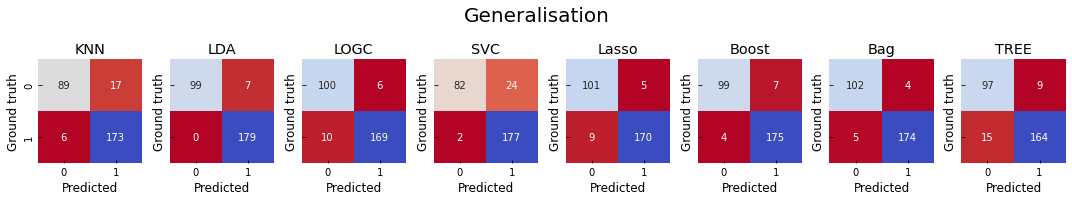

In [180]:
from sklearn.metrics import classification_report
from sklearn  import datasets
breast_cancer = datasets.load_breast_cancer()
X = pd.DataFrame(breast_cancer['data'],columns= breast_cancer['feature_names'])
y = pd.Series(breast_cancer['target'])
n_models = len(models.keys())

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=2022, shuffle=True,stratify=y)
report = []
confusion = {}
c = 0
for i,(name,mdl) in enumerate(models.items()):
    mdl.fit(X_train,y_train)
    tmp = classification_report(y_test, mdl.predict(X_test), output_dict=True)
    report.append(pd.concat([pd.DataFrame(tmp).T], keys=[name], names=['model','score']))
    confusion[name] = dict(test = confusion_matrix(y_test, mdl.predict(X_test)), 
                           train = confusion_matrix(y_train, mdl.predict(X_train)))

fig,ax = plt.subplots(1,n_models,figsize=(15,5),sharey=True)
ax = ax.flat
for i,name in enumerate(models.keys()):
    sns.heatmap(confusion[name]['test'],annot=True,fmt='.0f',cbar=False,ax=ax[i],cmap='coolwarm_r')
    ax[i].update(dict(xlabel='Predicted',ylabel='Ground truth',title=name))
    ax[i].set_aspect('equal','box')
fig.suptitle('Generalisation',y = 0.75,fontsize=20);
plt.tight_layout() 
    

# Beyond accuracy 
- [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) 
    - Precision is the fraction of true positives divided by the total number of samples classified as positive (i.e. $TP/(TP+FP)$)
    - Recall (also known as sensitivity) is the fraction of true positives divided by the total number of actual positive samples.  (i.e. $TP/(TP+FN)$)
- [The F1 score](https://en.wikipedia.org/wiki/F1_score) is the harmonic mean of the Precision and recall 


In [181]:
Bag = pd.concat(report).xs('Bag')
Bag

,precision,recall,f1-score,support
score,,,,
0,0.953271,0.962264,0.957746,106.000000
1,0.977528,0.972067,0.974790,179.000000
accuracy,0.968421,0.968421,0.968421,0.968421
macro avg,0.965400,0.967166,0.966268,285.000000
weighted avg,0.968506,0.968421,0.968451,285.000000


## macro avg 
- simply means taking the two class performance and averaging them

In [161]:
(0.970588 + 0.961749)/2

0.9661685

## weighted avg 
- simply means taking the two class performance and averaging their relative support

In [160]:
(0.970588*106 + 0.961749*179)/285

0.9650364877192982

In [183]:
weighted_avg = pd.concat(report).query('score == "weighted avg"')
weighted_avg

,,precision,recall,f1-score,support
model,score,,,,
KNN,weighted avg,0.920314,0.919298,0.918293,285.0
LDA,weighted avg,0.976363,0.975439,0.975255,285.0
LOGC,weighted avg,0.944654,0.943860,0.944062,285.0
SVC,weighted avg,0.916151,0.908772,0.906131,285.0
Lasso,weighted avg,0.951625,0.950877,0.951055,285.0
Boost,weighted avg,0.961400,0.961404,0.961287,285.0
Bag,weighted avg,0.968506,0.968421,0.968451,285.0
TREE,weighted avg,0.917514,0.915789,0.916231,285.0


# If we open the hood of our models
- By looking at the underlying relationship between observations and classes (by evaluating probability), we can gain some insight into the performance of the models (take this with a grain of salt)

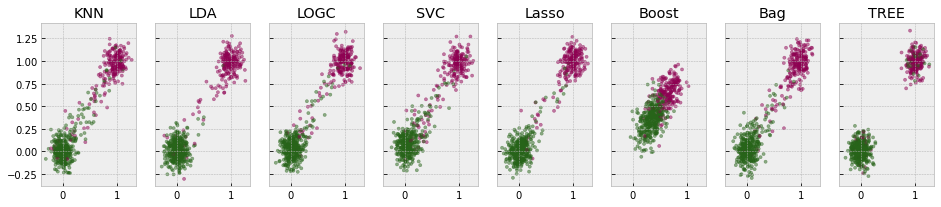

In [198]:
fig,ax = plt.subplots(1,n_models,sharey=True,sharex=True,figsize=(16,3))
rng = np.random.default_rng(2022)
for i,(title,mdl) in enumerate(models.items()):
    cv = KFold(n_splits=5,random_state=2022, shuffle=True)
    y_hat = np.vstack([y*0.1,y*0.1]).T
    for j,(ix_train, ix_test) in enumerate(cv.split(y)):
        mdl.fit(X.loc[ix_train],y[ix_train])
        y_hat[ix_test] = mdl.predict_proba(X.loc[ix_test])
    jx,jy = rng.normal(0,0.1,size=y.shape),rng.normal(0,0.1,size=y.shape)
    ax[i].scatter(y_hat[:,0]+jx,y_hat[:,0]+jy,c=y,s=10,alpha=0.5,cmap='PiYG')
    ax[i].set_title(title)

## Detection error tradeoff and receiver operating characteristic curves
A ROC curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
1. True Positive Rate (TPR) is a synonym for recall :
    $$ TPR = \frac{TP}{TP+TN} $$
1. False Positive Rate (FPR) :
    $$ FPR = \frac{FP}{FP+TN} $$

The detection error trade off graph plots the false rejection rate versus the false acceptance rate for binary classification systems.  With non-linear scaling of the x and y axes (or simply by logarithmic transformation), both yield trade off curves that are more linear than ROC curves, and which highlight the differences of importance most prominently in the critical operating region.

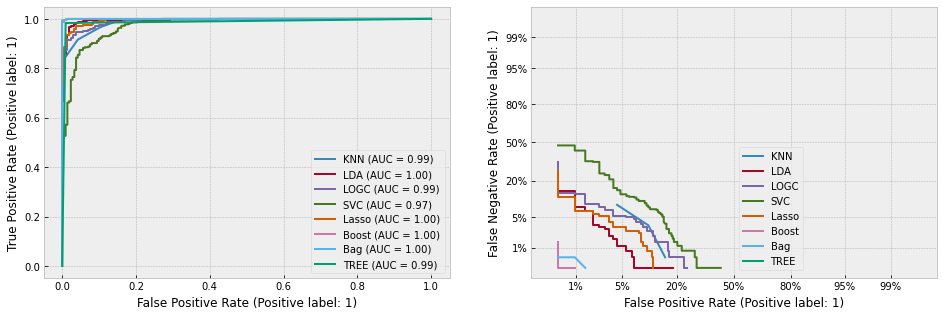

In [199]:
from sklearn.metrics import plot_det_curve,plot_roc_curve

fig,ax = plt.subplots(1,2,figsize=(16,5))
for title,mdl in models.items():
    plot_roc_curve(mdl, X, y, ax=ax[0], name=title)
    plot_det_curve(mdl, X, y, ax=ax[1], name=title)
ax[1].legend(bbox_to_anchor=(0.5, 0.5))

confusion[name]